In [1]:
import sys 
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import yaml
import argparse
from pathlib import Path
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import logging
import time
from typing import Dict, Any
import matplotlib.pyplot as plt

from model.model_utils import get_model_from_configs, create_model_with_pretrained
from training.training_loops import get_training_loop_by_model_name
from training.visualize import get_full_image_and_prediction, compute_metrics, plot_intensity_histograms, display_inference_results
from sarpyx.utils.losses import get_loss_function
from training_script import load_config
from training_script import create_dataloaders
import matplotlib.pyplot as plt
import numpy as np

def setup_logging():
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler("visualization.log"),
            logging.StreamHandler()
        ]
    )
    return logging.getLogger()

✓ Geopy available for land/sea classification
✓ Folium available for map visualization


INFO:root:Configuration Summary:
INFO:root:  Data directory: /Data/sar_focusing
INFO:root:  Level from: rc
INFO:root:  Level to: az
INFO:root:  Patch size: [5000, 1]
INFO:root:  Batch size: 30
INFO:root:  Save directory: ./visualizations
INFO:root:Creating test dataloader...
INFO:root:  Data directory: /Data/sar_focusing
INFO:root:  Level from: rc
INFO:root:  Level to: az
INFO:root:  Patch size: [5000, 1]
INFO:root:  Batch size: 30
INFO:root:  Save directory: ./visualizations
INFO:root:Creating test dataloader...


Total files found in remote repository: 967
Getting balanced sample of 8 files from train set...
  Loading existing split file: /Data/sar_focusing/train_products.csv
Loaded 609 products from train split
After SampleFilter: 228 products remain
  Sample filenames: [PosixPath('/Data/sar_focusing/PT1/s1a-s1-raw-s-vv-20230331t123129-20230331t123154-047888-05c119.zarr'), PosixPath('/Data/sar_focusing/PT1/s1a-s1-raw-s-vv-20230423t020723-20230423t020749-048217-05cc37.zarr'), PosixPath('/Data/sar_focusing/PT1/s1a-s1-raw-s-vv-20230505t020724-20230505t020749-048392-05d21b.zarr')]

Balanced sampling with EQUAL scene type representation:
  Total available products (after filters): 228
  Dropped 2 duplicate positions
  Remaining unique positions: 226

  Scene type distribution after deduplication:
    sea: 221 products (97.8%)
    land: 3 products (1.3%)
    coast: 2 products (0.9%)

  Target: 8 total samples
  Using LAND and COAST scenes (sea excluded)
  Equal allocation: 4 samples per scene type
 

INFO:root:Created test dataloader with 1200 batches
INFO:root:Dataset contains 30000 samples
INFO:root:Dataset contains 30000 samples
INFO:root:Starting sample visualization...
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:root:Starting sample visualization...
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [l

Checkpoint keys: ['output_gain', 'input_proj.W_real.weight', 'input_proj.W_real.bias', 'input_proj.W_imag.weight', 'input_proj.W_imag.bias', 'output_proj.W_real.weight', 'output_proj.W_real.bias', 'output_proj.W_imag.weight', 'output_proj.W_imag.bias', 'layers.0.D', 'layers.0.kernel.kernel.C', 'layers.0.kernel.kernel.log_dt', 'layers.0.kernel.kernel.log_w_real', 'layers.0.kernel.kernel.w_imag', 'layers.0.output_linear.real.weight', 'layers.0.output_linear.real.bias', 'layers.0.output_linear.imag.weight', 'layers.0.output_linear.imag.bias', 'layers.1.D', 'layers.1.kernel.kernel.C', 'layers.1.kernel.kernel.log_dt', 'layers.1.kernel.kernel.log_w_real', 'layers.1.kernel.kernel.w_imag', 'layers.1.output_linear.real.weight', 'layers.1.output_linear.real.bias', 'layers.1.output_linear.imag.weight', 'layers.1.output_linear.imag.bias', 'layers.2.D', 'layers.2.kernel.kernel.C', 'layers.2.kernel.kernel.log_dt', 'layers.2.kernel.kernel.log_w_real', 'layers.2.kernel.kernel.w_imag', 'layers.2.output

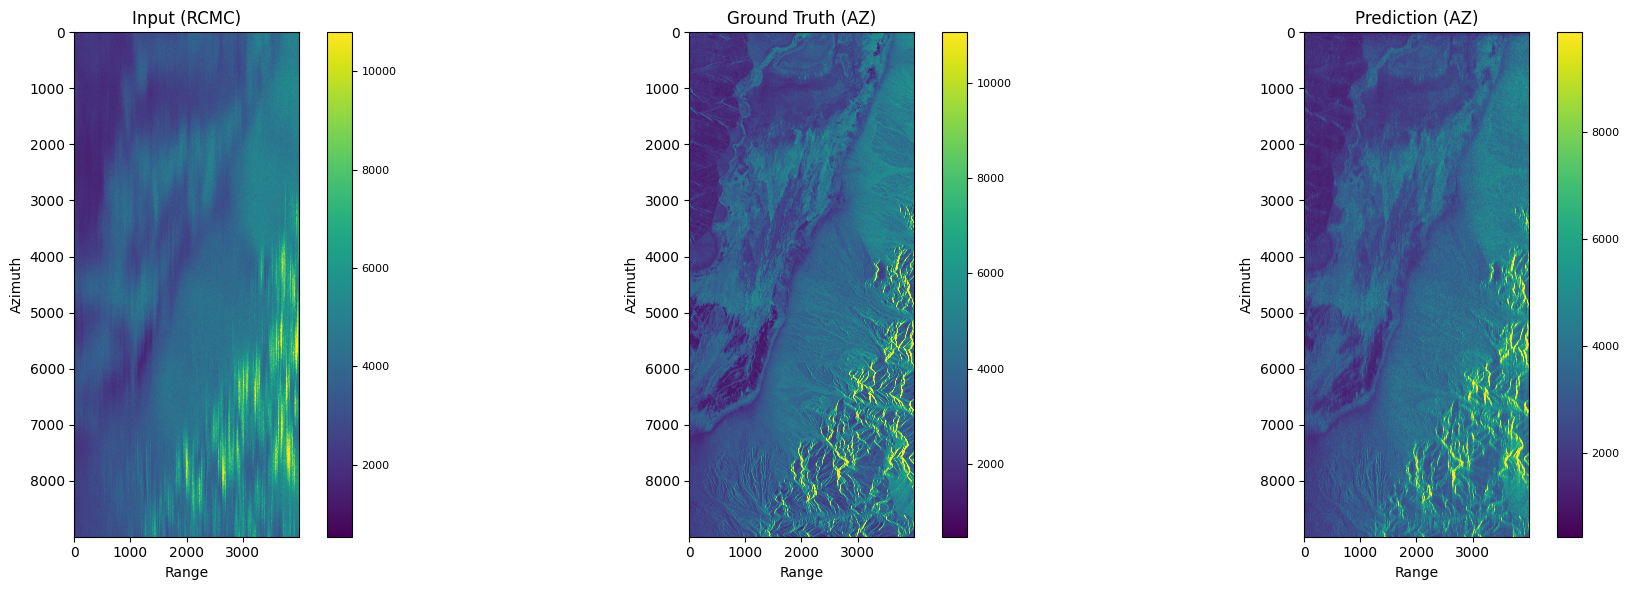

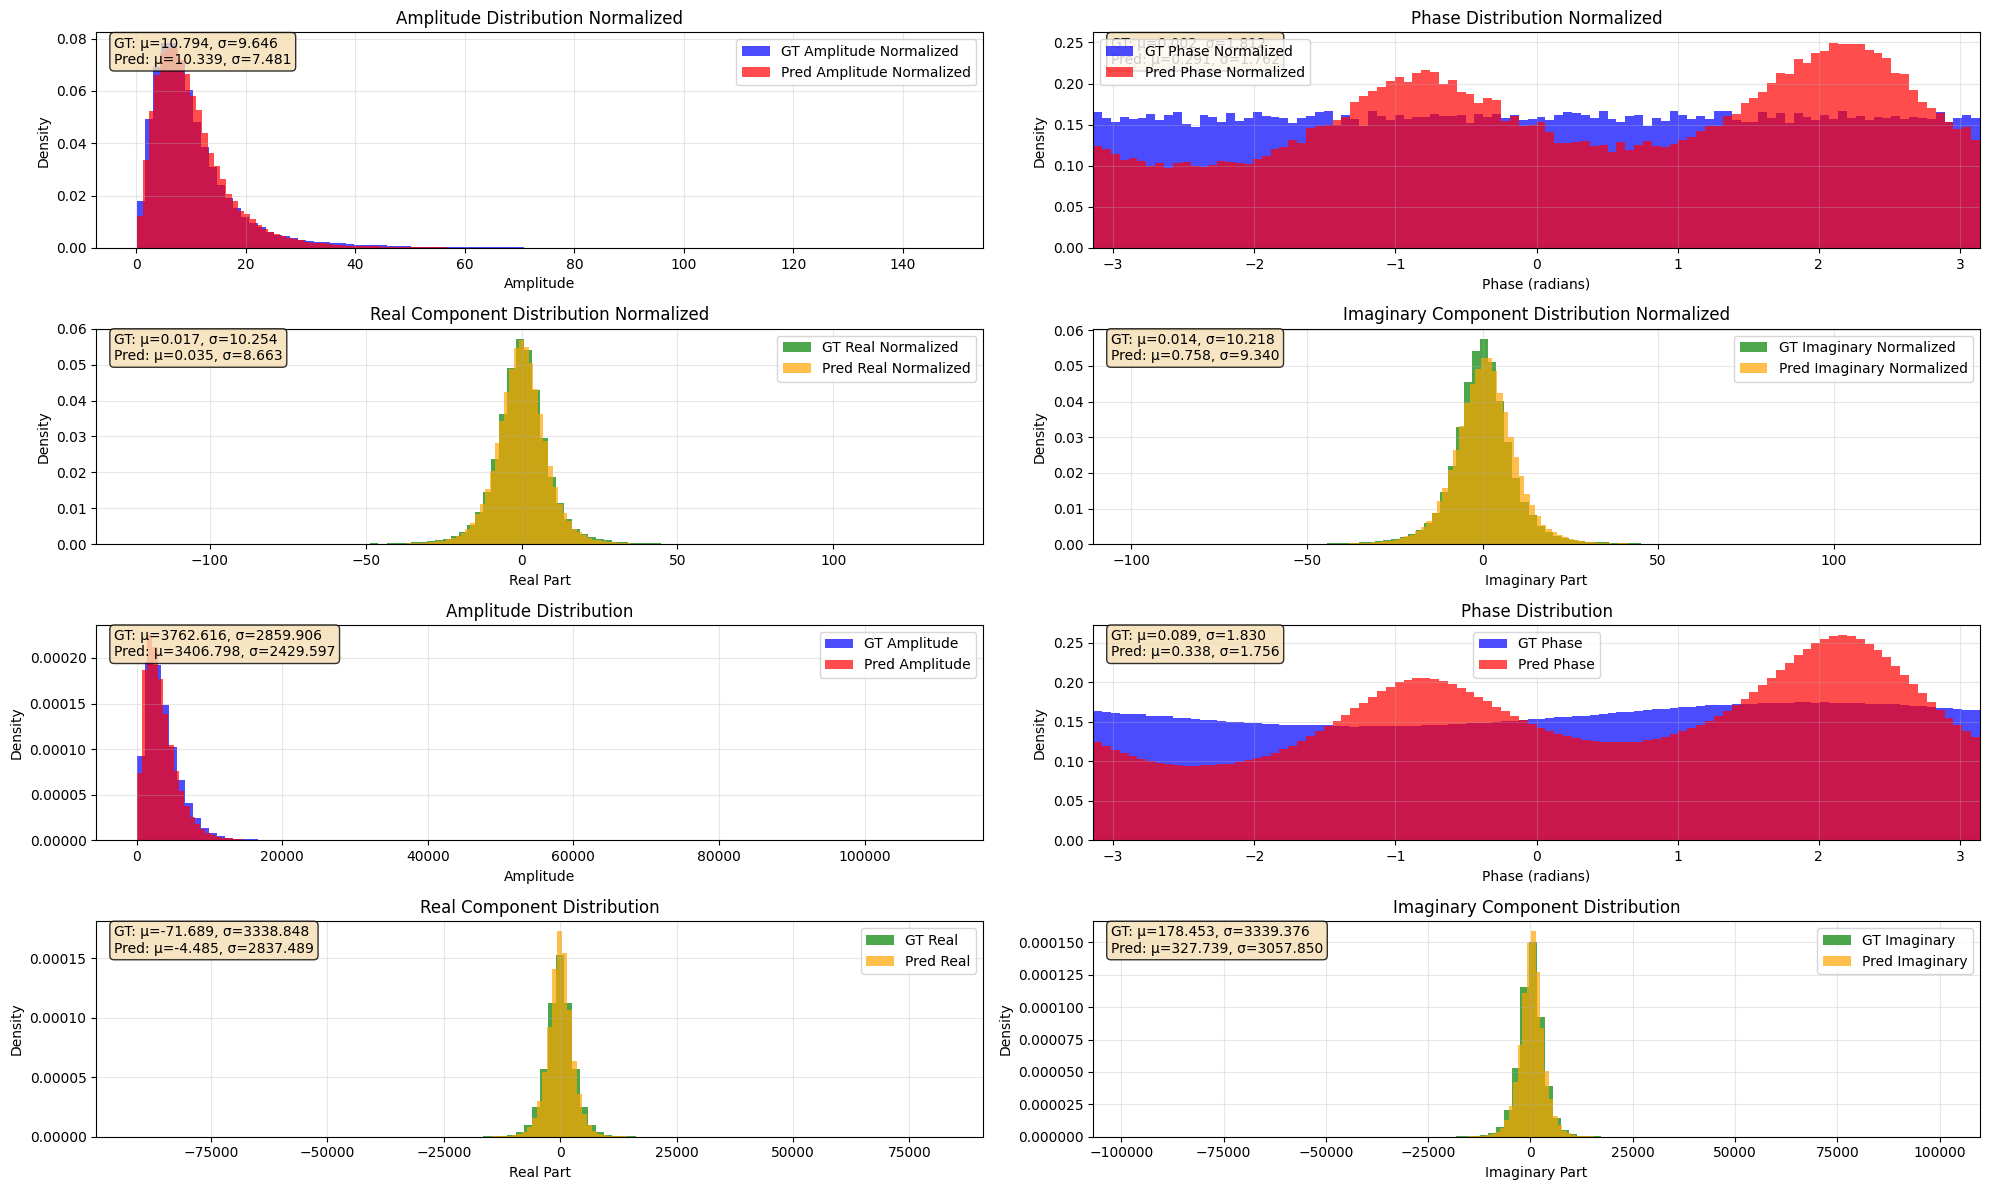


COMPLEX SAR DATA STATISTICS

Amplitude Normalized Component:
------------------------------
  GT    - Mean:  10.7942, Std:   9.6456, Min:   0.0341, Max: 147.2944
  Pred  - Mean:  10.3391, Std:   7.4806, Min:   0.0291, Max: 108.9719
  Diff  - Mean:   0.4551, Std:  10.3841

Phase Normalized Component:
------------------------------
  GT    - Mean:   0.0021, Std:   1.8122, Min:  -3.1415, Max:   3.1416
  Pred  - Mean:   0.2910, Std:   1.7620, Min:  -3.1416, Max:   3.1414
  Diff  - Mean:  -0.2889, Std:   2.5304

Real Normalized Component:
------------------------------
  GT    - Mean:   0.0172, Std:  10.2542, Min: -123.4916, Max: 135.1266
  Pred  - Mean:   0.0348, Std:   8.6631, Min: -77.2410, Max:  78.6155
  Diff  - Mean:  -0.0176, Std:  13.4100

Imaginary Normalized Component:
------------------------------
  GT    - Mean:   0.0138, Std:  10.2178, Min: -99.4005, Max: 130.1521
  Pred  - Mean:   0.7578, Std:   9.3398, Min: -76.8360, Max:  78.8993
  Diff  - Mean:  -0.7440, Std:  13.8541

Am

INFO:root:Visualization completed successfully!
INFO:root:Check the visualizations in: ./visualizations
INFO:root:Check the visualizations in: ./visualizations


  Diff  - Mean: -149.2854, Std: 4528.2114
Total inference time for 0 batches: 5.02 seconds
Only one batch processed, total time: 5.02 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 6623.6MB | GPU Allocated: 8.2MB | GPU Reserved: 66.0MB
Peak memory: RAM: 10528.9MB | GPU Allocated: 9.4MB | GPU Reserved: 84.0MB
Average RAM increase per inference: -0.0MB
Maximum RAM increase per inference: 0.0MB
Average GPU allocated increase per inference: 1.1MB
Maximum GPU allocated increase per inference: 1.1MB
Average GPU reserved increase per inference: -0.0MB
Maximum GPU reserved increase per inference: 18.0MB
Total RAM increase during inference: 3882.7MB
Total GPU allocated increase during inference: 0.8MB

Total inference time for 0 batches: 5.02 seconds
Only one batch processed, total time: 5.02 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 6623.6MB | GPU Allocated: 8.2MB | GPU Reserved: 66.0MB
Peak memory: RAM: 10528.9MB | GPU Allocated: 9.4MB | GPU Reserved

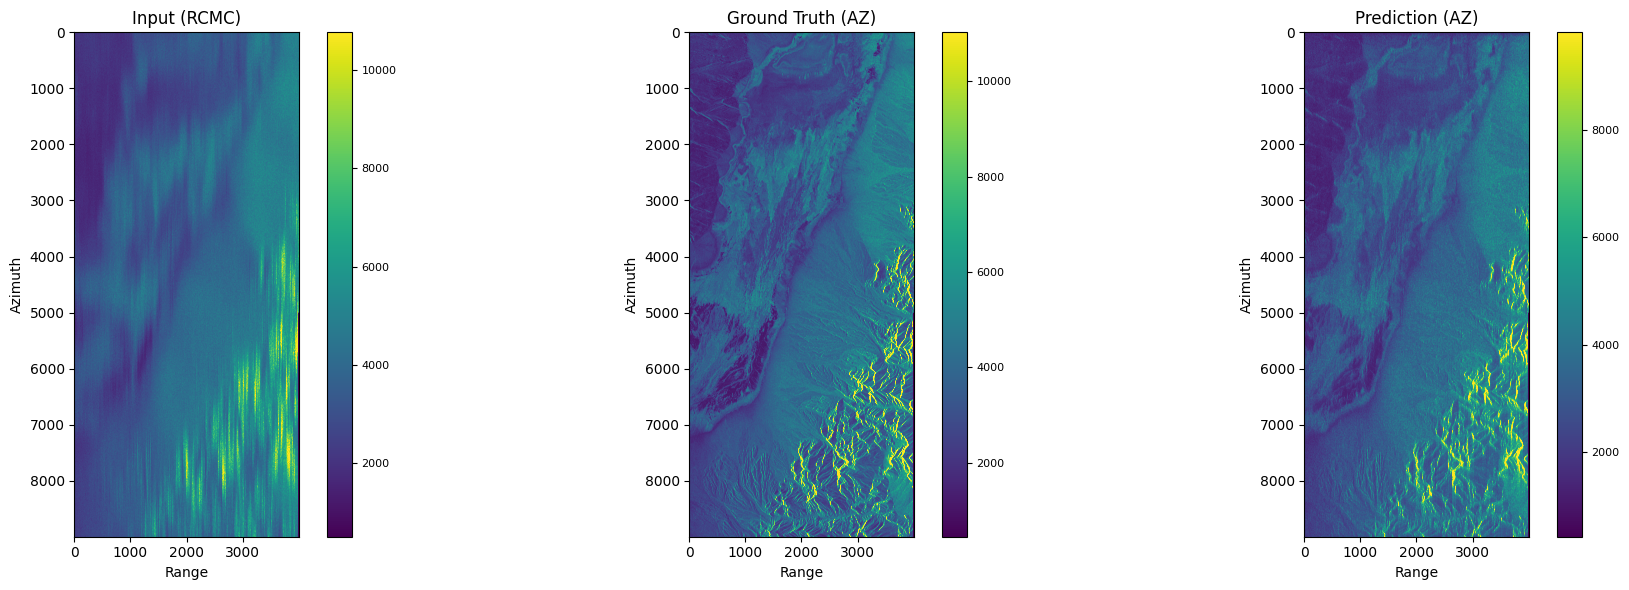

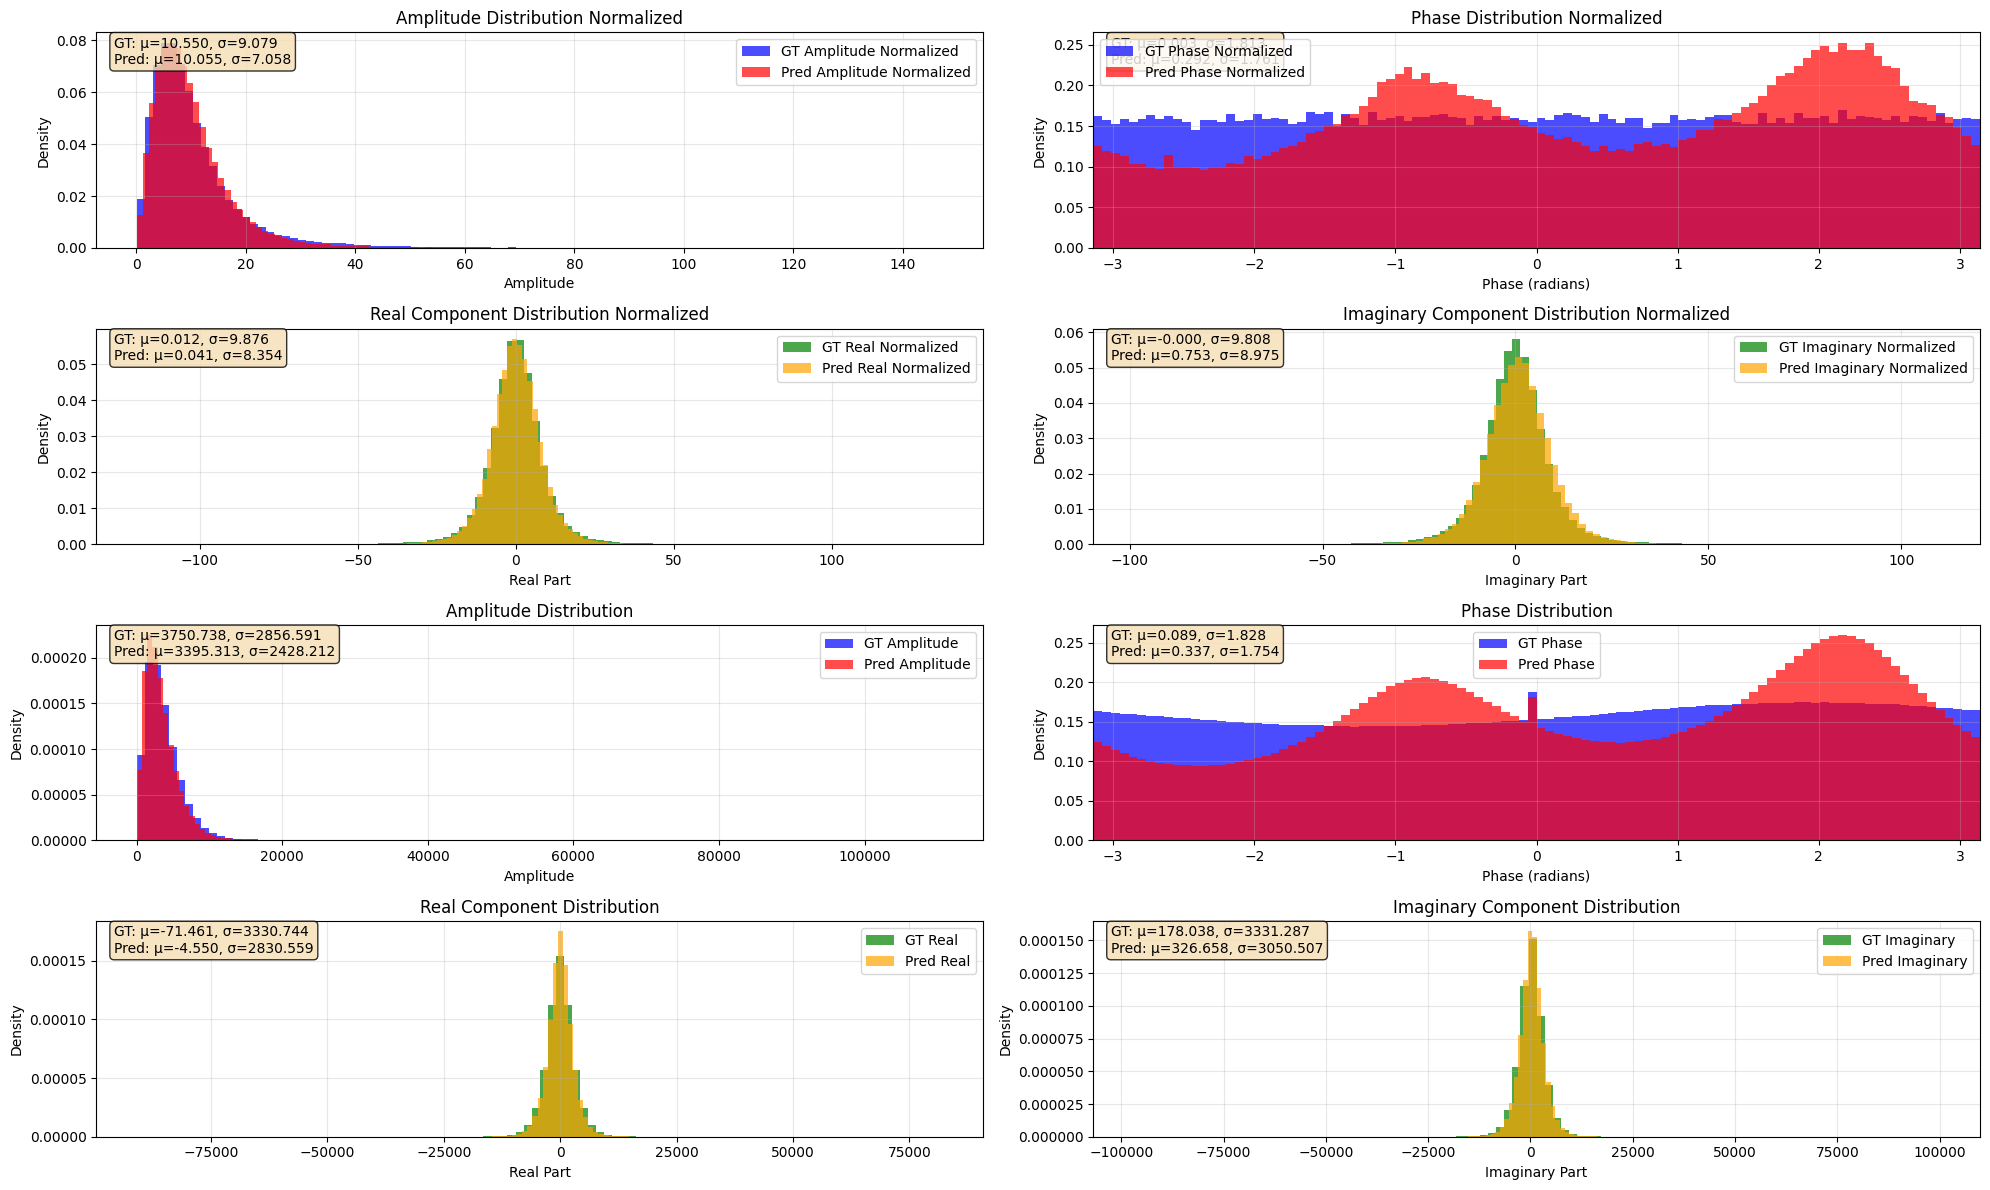


COMPLEX SAR DATA STATISTICS

Amplitude Normalized Component:
------------------------------
  GT    - Mean:  10.5497, Std:   9.0789, Min:   0.0644, Max: 147.2944
  Pred  - Mean:  10.0548, Std:   7.0577, Min:   0.0358, Max: 114.7081
  Diff  - Mean:   0.4949, Std:   9.9860

Phase Normalized Component:
------------------------------
  GT    - Mean:   0.0030, Std:   1.8126, Min:  -3.1415, Max:   3.1416
  Pred  - Mean:   0.2916, Std:   1.7609, Min:  -3.1416, Max:   3.1416
  Diff  - Mean:  -0.2887, Std:   2.5236

Real Normalized Component:
------------------------------
  GT    - Mean:   0.0120, Std:   9.8756, Min: -120.0391, Max: 135.1266
  Pred  - Mean:   0.0406, Std:   8.3538, Min: -77.6088, Max:  81.7670
  Diff  - Mean:  -0.0286, Std:  12.9343

Imaginary Normalized Component:
------------------------------
  GT    - Mean:  -0.0004, Std:   9.8080, Min: -99.0108, Max: 109.9920
  Pred  - Mean:   0.7529, Std:   8.9753, Min: -89.7121, Max:  93.3108
  Diff  - Mean:  -0.7532, Std:  13.2832

Am

INFO:root:Visualization completed successfully!
INFO:root:Check the visualizations in: ./visualizations
INFO:root:Check the visualizations in: ./visualizations


  Diff  - Mean: -148.6206, Std: 4517.3896
Total inference time for 0 batches: 6.99 seconds
Only one batch processed, total time: 6.99 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 9700.2MB | GPU Allocated: 8.2MB | GPU Reserved: 64.0MB
Peak memory: RAM: 13596.9MB | GPU Allocated: 9.2MB | GPU Reserved: 66.0MB
Average RAM increase per inference: 0.0MB
Maximum RAM increase per inference: 0.0MB
Average GPU allocated increase per inference: 1.0MB
Maximum GPU allocated increase per inference: 1.0MB
Average GPU reserved increase per inference: 0.0MB
Maximum GPU reserved increase per inference: 2.0MB
Total RAM increase during inference: 3896.7MB
Total GPU allocated increase during inference: 1.0MB

Total inference time for 0 batches: 6.99 seconds
Only one batch processed, total time: 6.99 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 9700.2MB | GPU Allocated: 8.2MB | GPU Reserved: 64.0MB
Peak memory: RAM: 13596.9MB | GPU Allocated: 9.2MB | GPU Reserved: 6

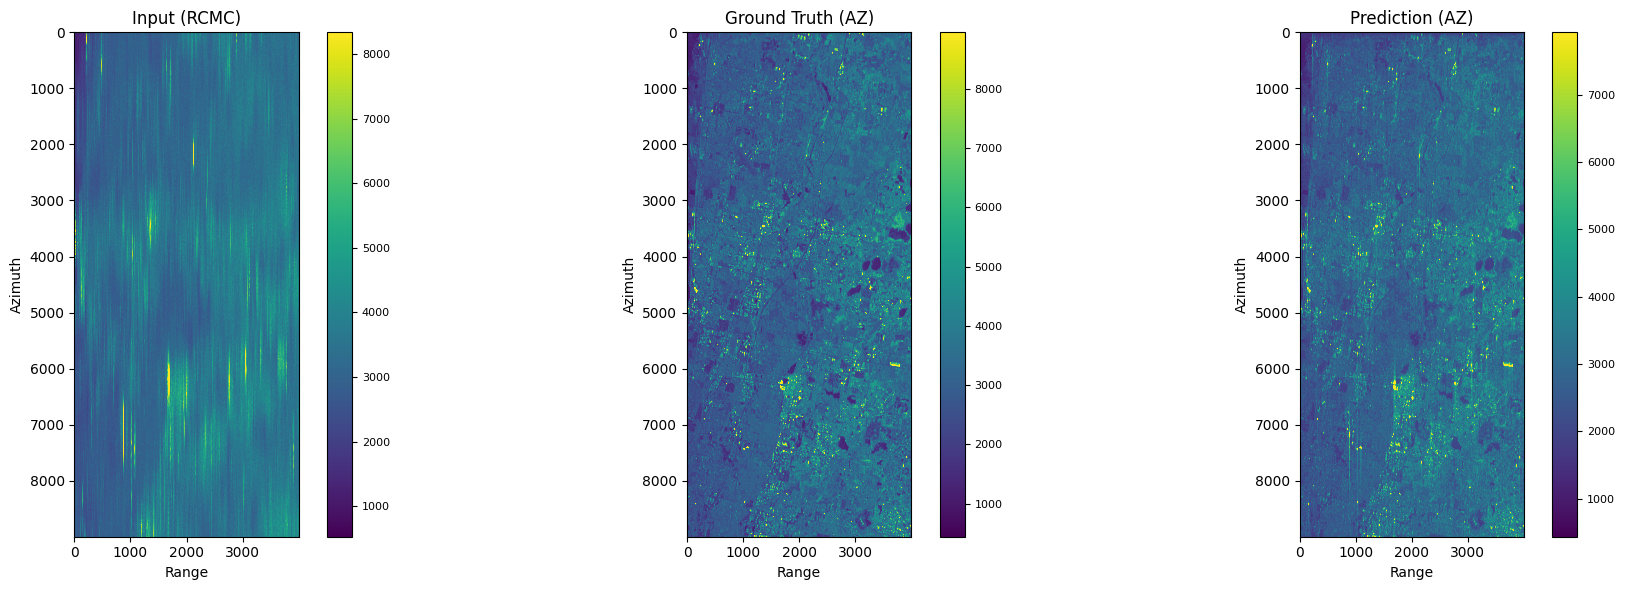

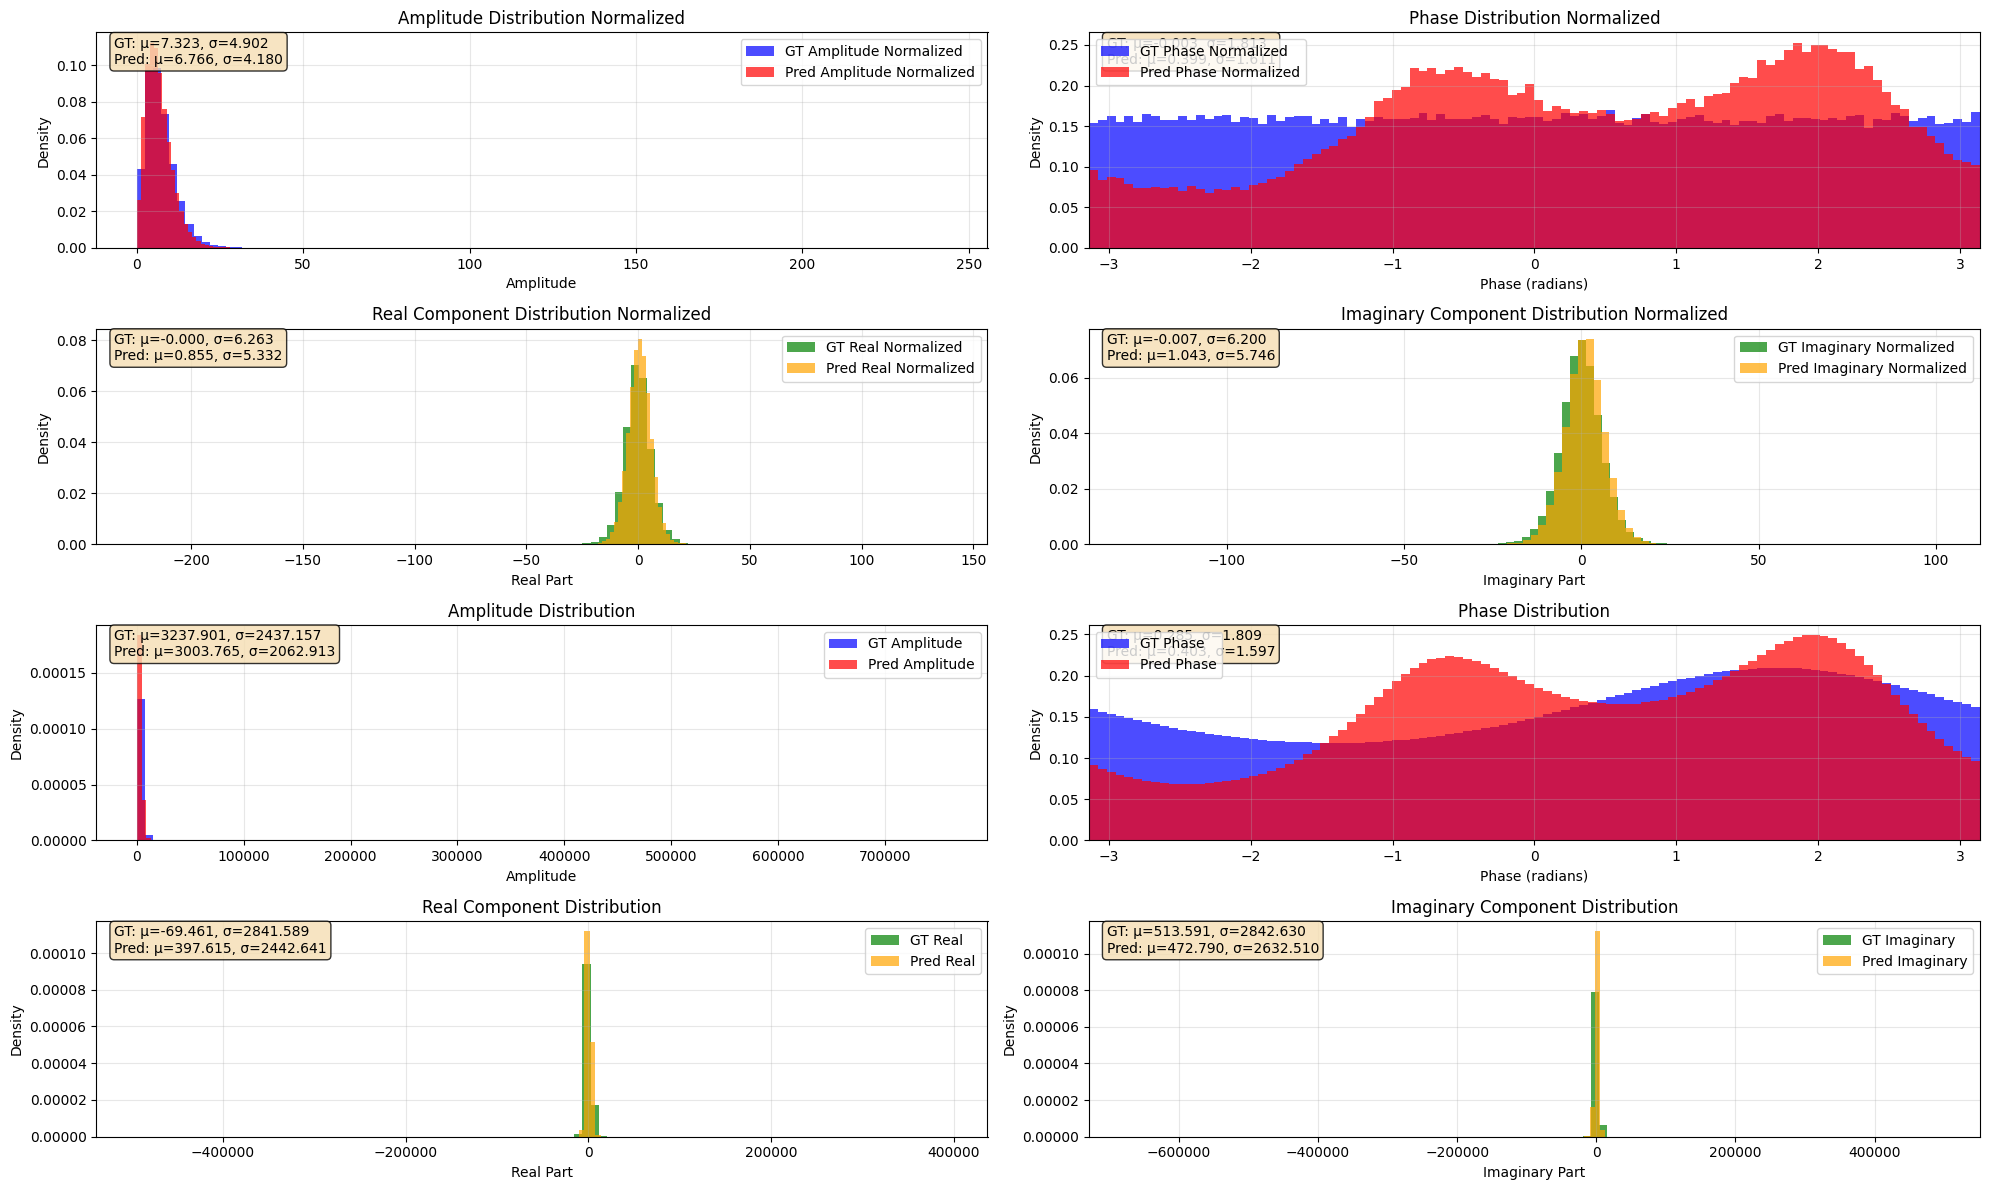


COMPLEX SAR DATA STATISTICS

Amplitude Normalized Component:
------------------------------
  GT    - Mean:   7.3230, Std:   4.9020, Min:   0.0125, Max: 243.4227
  Pred  - Mean:   6.7661, Std:   4.1804, Min:   0.0255, Max: 127.8333
  Diff  - Mean:   0.5569, Std:   5.0850

Phase Normalized Component:
------------------------------
  GT    - Mean:  -0.0028, Std:   1.8135, Min:  -3.1416, Max:   3.1416
  Pred  - Mean:   0.3986, Std:   1.6108, Min:  -3.1414, Max:   3.1414
  Diff  - Mean:  -0.4015, Std:   2.4299

Real Normalized Component:
------------------------------
  GT    - Mean:  -0.0001, Std:   6.2625, Min: -224.2565, Max: 138.2397
  Pred  - Mean:   0.8546, Std:   5.3316, Min: -109.4547, Max:  70.1475
  Diff  - Mean:  -0.8547, Std:   8.2616

Imaginary Normalized Component:
------------------------------
  GT    - Mean:  -0.0065, Std:   6.1997, Min: -125.3911, Max: 100.9933
  Pred  - Mean:   1.0431, Std:   5.7456, Min: -127.5139, Max:  94.4033
  Diff  - Mean:  -1.0497, Std:   8.4636


INFO:root:Visualization completed successfully!
INFO:root:Check the visualizations in: ./visualizations
INFO:root:Check the visualizations in: ./visualizations


  Diff  - Mean:  40.8005, Std: 3872.0957
Total inference time for 0 batches: 7.79 seconds
Only one batch processed, total time: 7.79 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 12779.0MB | GPU Allocated: 8.2MB | GPU Reserved: 66.0MB
Peak memory: RAM: 16674.9MB | GPU Allocated: 9.4MB | GPU Reserved: 84.0MB
Average RAM increase per inference: 0.0MB
Maximum RAM increase per inference: 0.0MB
Average GPU allocated increase per inference: 1.1MB
Maximum GPU allocated increase per inference: 1.1MB
Average GPU reserved increase per inference: -0.0MB
Maximum GPU reserved increase per inference: 18.0MB
Total RAM increase during inference: 3895.9MB
Total GPU allocated increase during inference: 0.8MB

Total inference time for 0 batches: 7.79 seconds
Only one batch processed, total time: 7.79 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 12779.0MB | GPU Allocated: 8.2MB | GPU Reserved: 66.0MB
Peak memory: RAM: 16674.9MB | GPU Allocated: 9.4MB | GPU Reserved

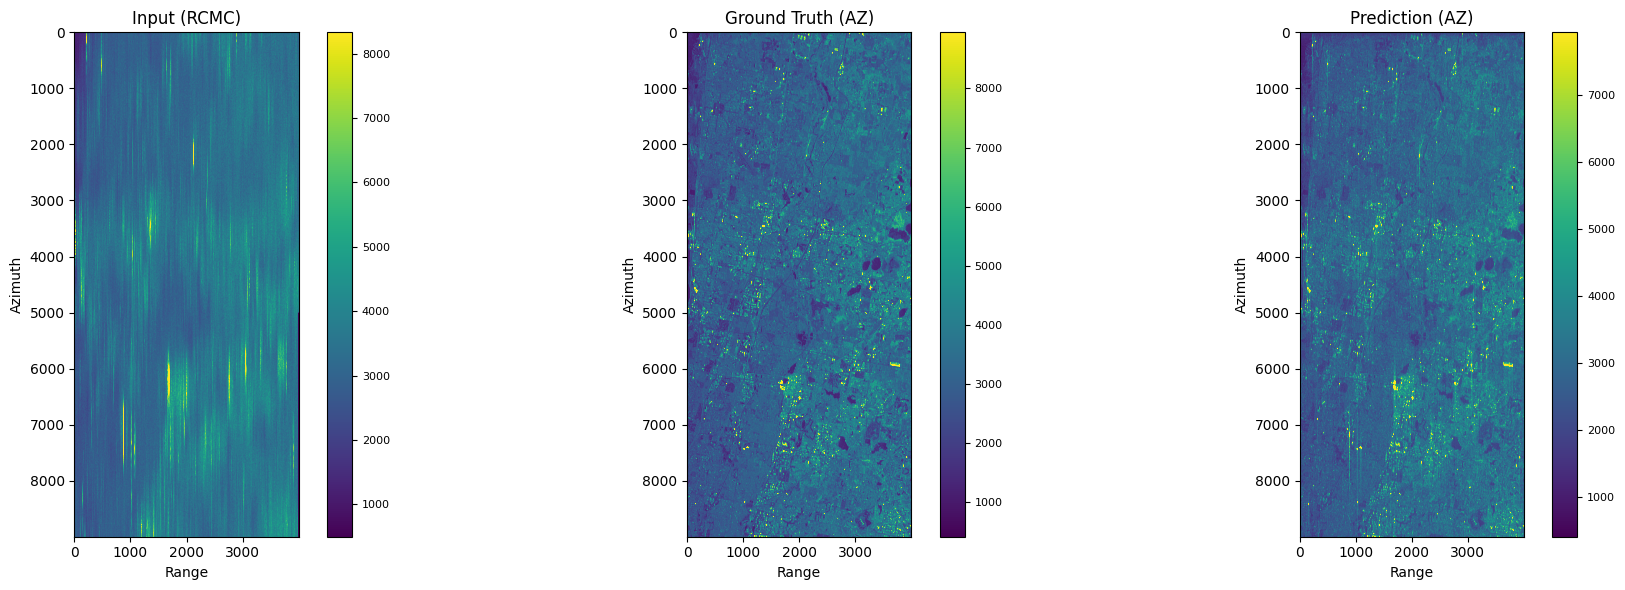

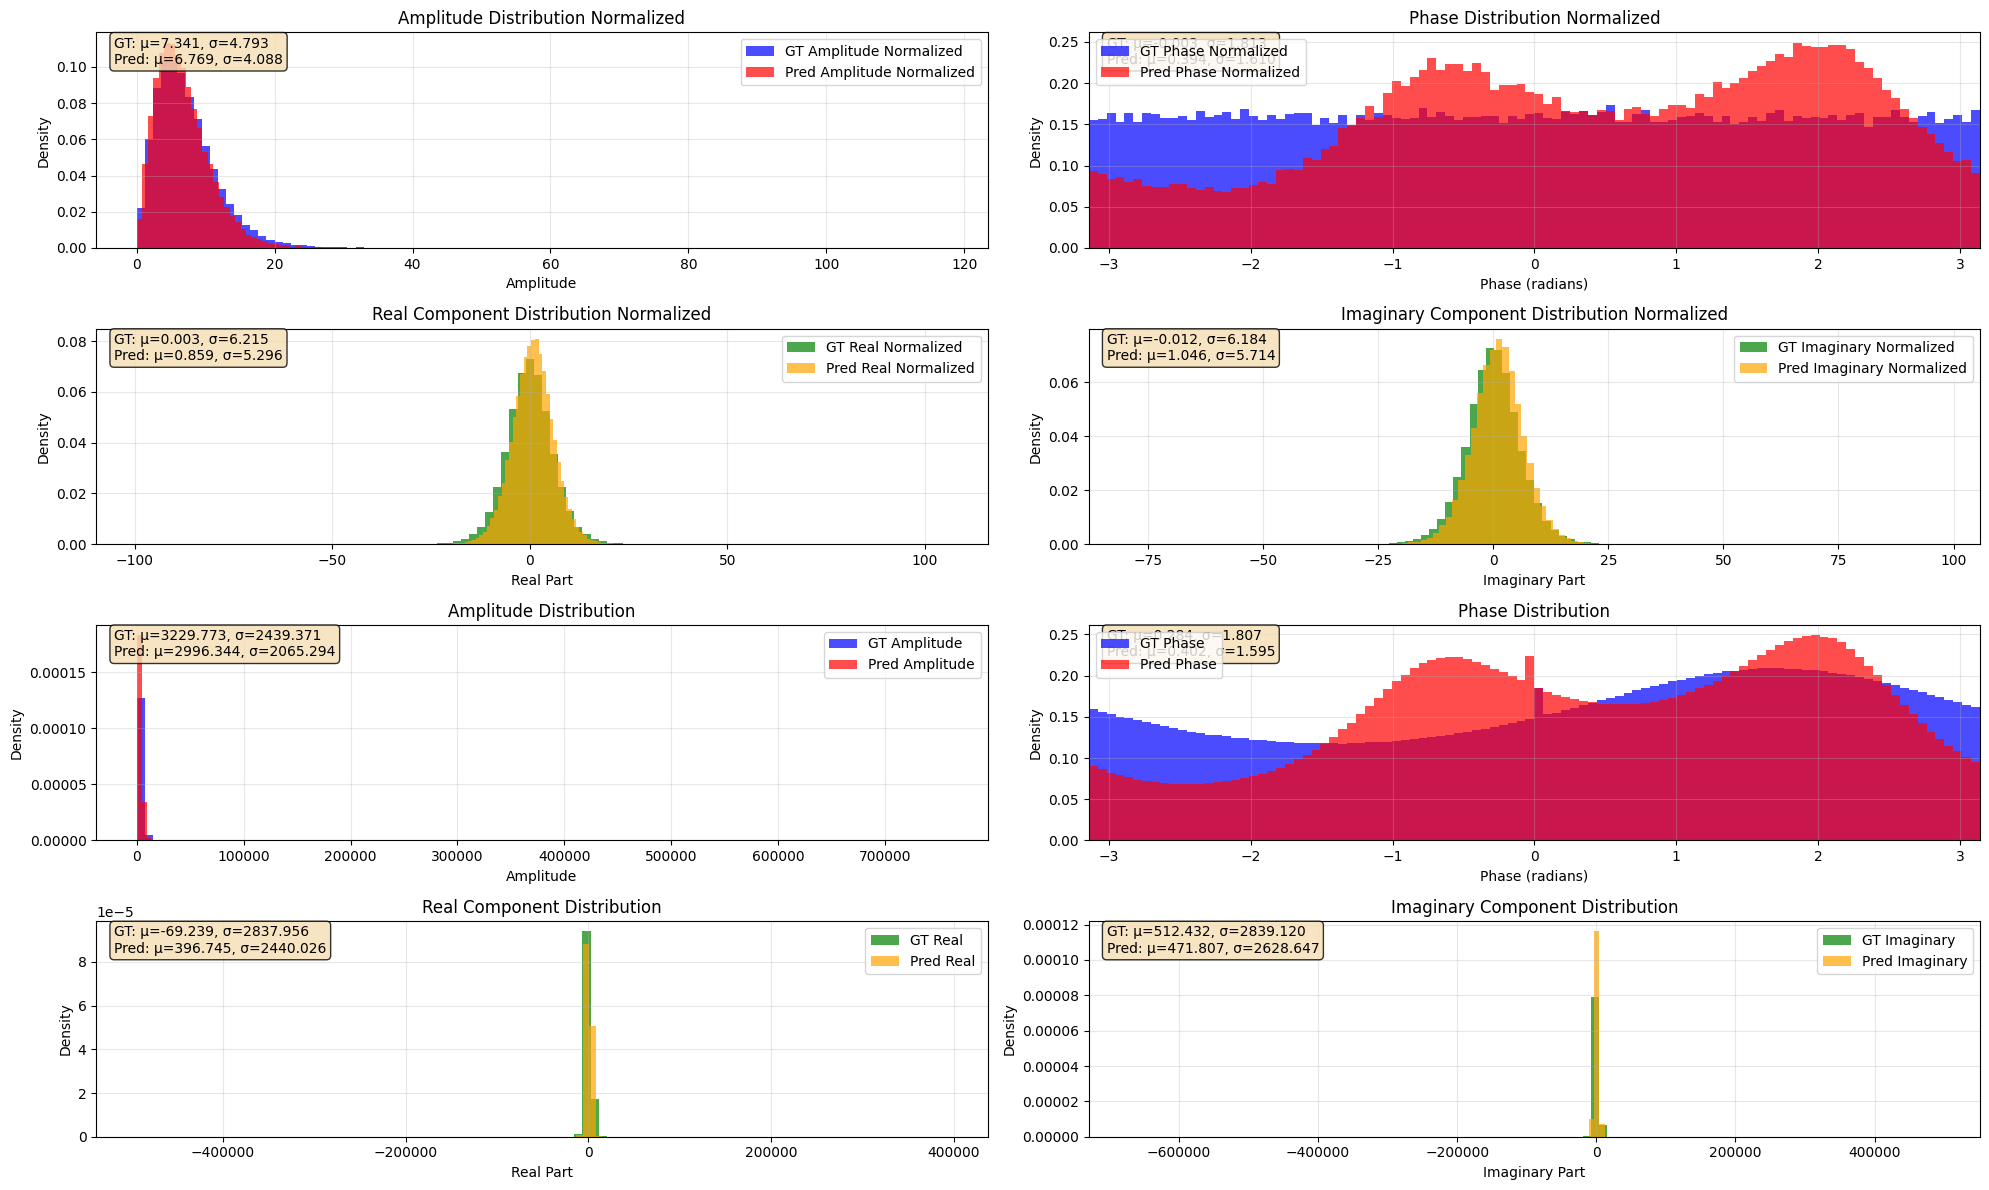


COMPLEX SAR DATA STATISTICS

Amplitude Normalized Component:
------------------------------
  GT    - Mean:   7.3414, Std:   4.7931, Min:   0.0125, Max: 117.4945
  Pred  - Mean:   6.7690, Std:   4.0880, Min:   0.0276, Max:  79.1321
  Diff  - Mean:   0.5725, Std:   5.0465

Phase Normalized Component:
------------------------------
  GT    - Mean:  -0.0034, Std:   1.8126, Min:  -3.1416, Max:   3.1416
  Pred  - Mean:   0.3941, Std:   1.6105, Min:  -3.1415, Max:   3.1415
  Diff  - Mean:  -0.3975, Std:   2.4302

Real Normalized Component:
------------------------------
  GT    - Mean:   0.0032, Std:   6.2147, Min: -99.4246, Max: 105.6206
  Pred  - Mean:   0.8591, Std:   5.2964, Min: -43.6097, Max:  49.9968
  Diff  - Mean:  -0.8559, Std:   8.1456

Imaginary Normalized Component:
------------------------------
  GT    - Mean:  -0.0115, Std:   6.1845, Min: -79.1267, Max:  96.9547
  Pred  - Mean:   1.0464, Std:   5.7136, Min: -66.3684, Max:  70.2619
  Diff  - Mean:  -1.0580, Std:   8.4726

Amp

INFO:root:Visualization completed successfully!
INFO:root:Check the visualizations in: ./visualizations
INFO:root:Check the visualizations in: ./visualizations


  Pred  - Mean: 471.8072, Std: 2628.6472, Min: -378354.1875, Max: 372263.0938
  Diff  - Mean:  40.6241, Std: 3867.4229
Total inference time for 0 batches: 4.46 seconds
Only one batch processed, total time: 4.46 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 15844.8MB | GPU Allocated: 8.2MB | GPU Reserved: 64.0MB
Peak memory: RAM: 19741.0MB | GPU Allocated: 9.2MB | GPU Reserved: 66.0MB
Average RAM increase per inference: 0.0MB
Maximum RAM increase per inference: 0.0MB
Average GPU allocated increase per inference: 1.0MB
Maximum GPU allocated increase per inference: 1.0MB
Average GPU reserved increase per inference: 0.0MB
Maximum GPU reserved increase per inference: 2.0MB
Total RAM increase during inference: 3896.2MB
Total GPU allocated increase during inference: 1.0MB

Total inference time for 0 batches: 4.46 seconds
Only one batch processed, total time: 4.46 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 15844.8MB | GPU Allocated: 8.2MB | GPU Reserv

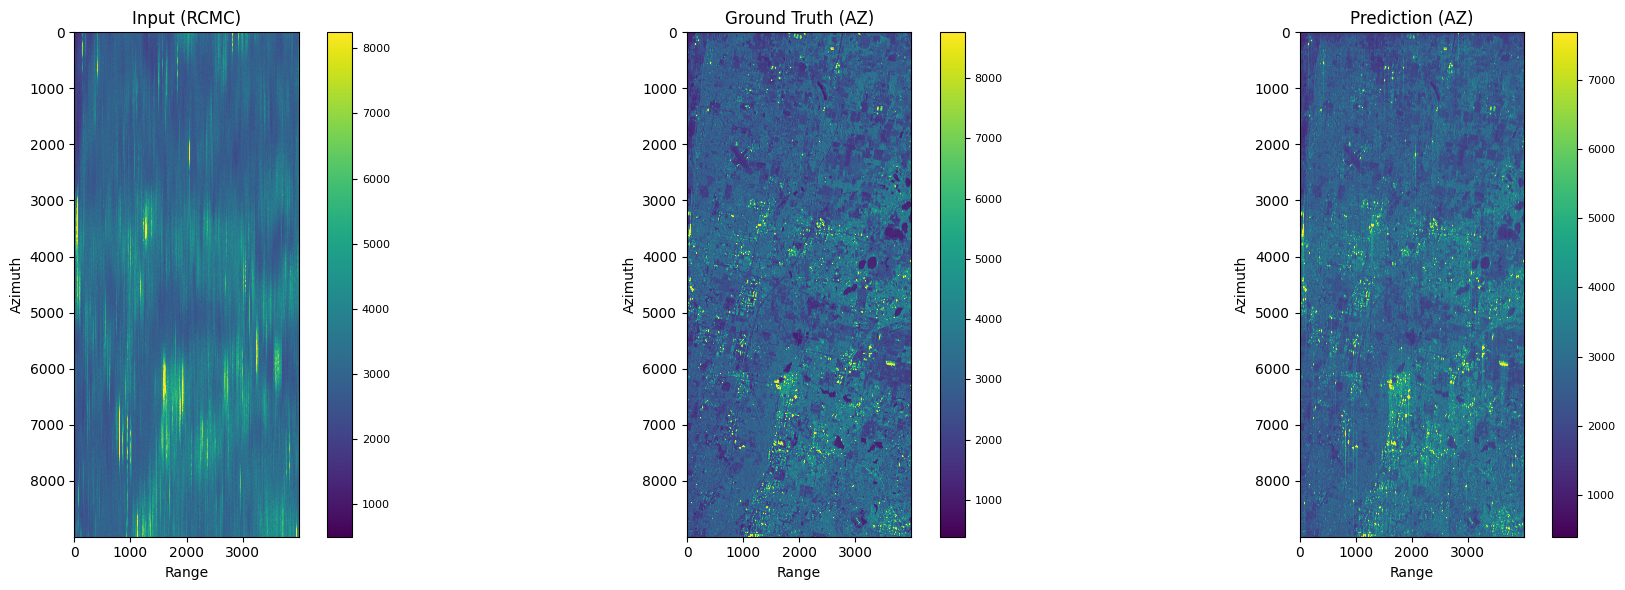

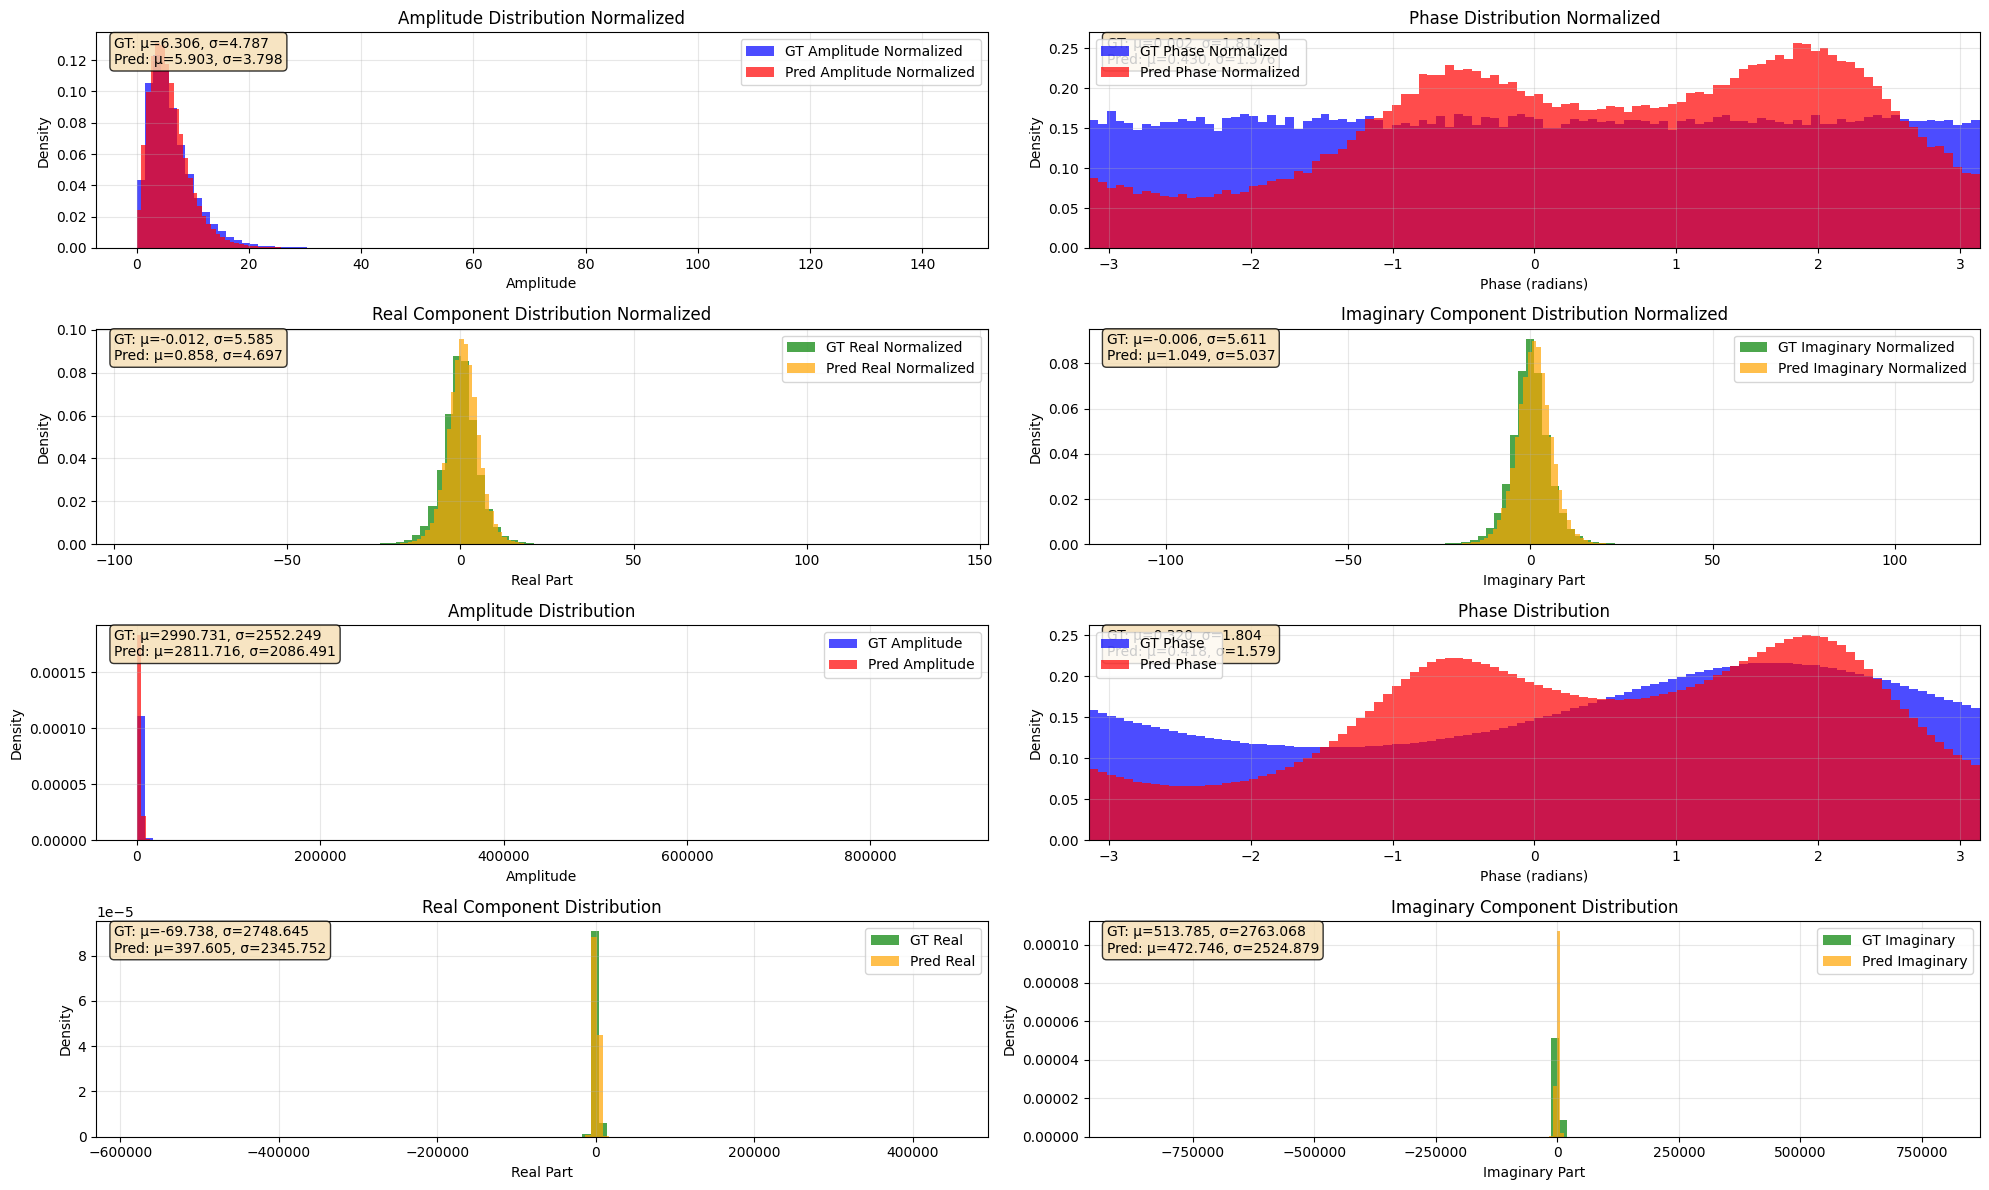


COMPLEX SAR DATA STATISTICS

Amplitude Normalized Component:
------------------------------
  GT    - Mean:   6.3062, Std:   4.7866, Min:   0.0099, Max: 144.3672
  Pred  - Mean:   5.9028, Std:   3.7983, Min:   0.0188, Max:  82.7200
  Diff  - Mean:   0.4034, Std:   4.6589

Phase Normalized Component:
------------------------------
  GT    - Mean:   0.0024, Std:   1.8140, Min:  -3.1415, Max:   3.1416
  Pred  - Mean:   0.4296, Std:   1.5764, Min:  -3.1415, Max:   3.1415
  Diff  - Mean:  -0.4272, Std:   2.4015

Real Normalized Component:
------------------------------
  GT    - Mean:  -0.0119, Std:   5.5850, Min: -93.4835, Max: 140.5362
  Pred  - Mean:   0.8581, Std:   4.6974, Min: -67.0387, Max:  56.5961
  Diff  - Mean:  -0.8700, Std:   7.3354

Imaginary Normalized Component:
------------------------------
  GT    - Mean:  -0.0058, Std:   5.6113, Min: -110.0124, Max: 112.2747
  Pred  - Mean:   1.0485, Std:   5.0367, Min: -60.3281, Max:  58.8268
  Diff  - Mean:  -1.0544, Std:   7.5139

Am

INFO:root:Visualization completed successfully!
INFO:root:Check the visualizations in: ./visualizations
INFO:root:Check the visualizations in: ./visualizations


  Diff  - Mean:  41.0377, Std: 3738.1675
Total inference time for 0 batches: 3.74 seconds
Only one batch processed, total time: 3.74 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 18923.3MB | GPU Allocated: 8.2MB | GPU Reserved: 66.0MB
Peak memory: RAM: 22820.2MB | GPU Allocated: 9.4MB | GPU Reserved: 84.0MB
Average RAM increase per inference: 0.0MB
Maximum RAM increase per inference: 0.0MB
Average GPU allocated increase per inference: 1.1MB
Maximum GPU allocated increase per inference: 1.1MB
Average GPU reserved increase per inference: -0.0MB
Maximum GPU reserved increase per inference: 18.0MB
Total RAM increase during inference: 3896.9MB
Total GPU allocated increase during inference: 0.8MB

Total inference time for 0 batches: 3.74 seconds
Only one batch processed, total time: 3.74 seconds

=== INFERENCE MEMORY STATISTICS ===
Initial memory: RAM: 18923.3MB | GPU Allocated: 8.2MB | GPU Reserved: 66.0MB
Peak memory: RAM: 22820.2MB | GPU Allocated: 9.4MB | GPU Reserved

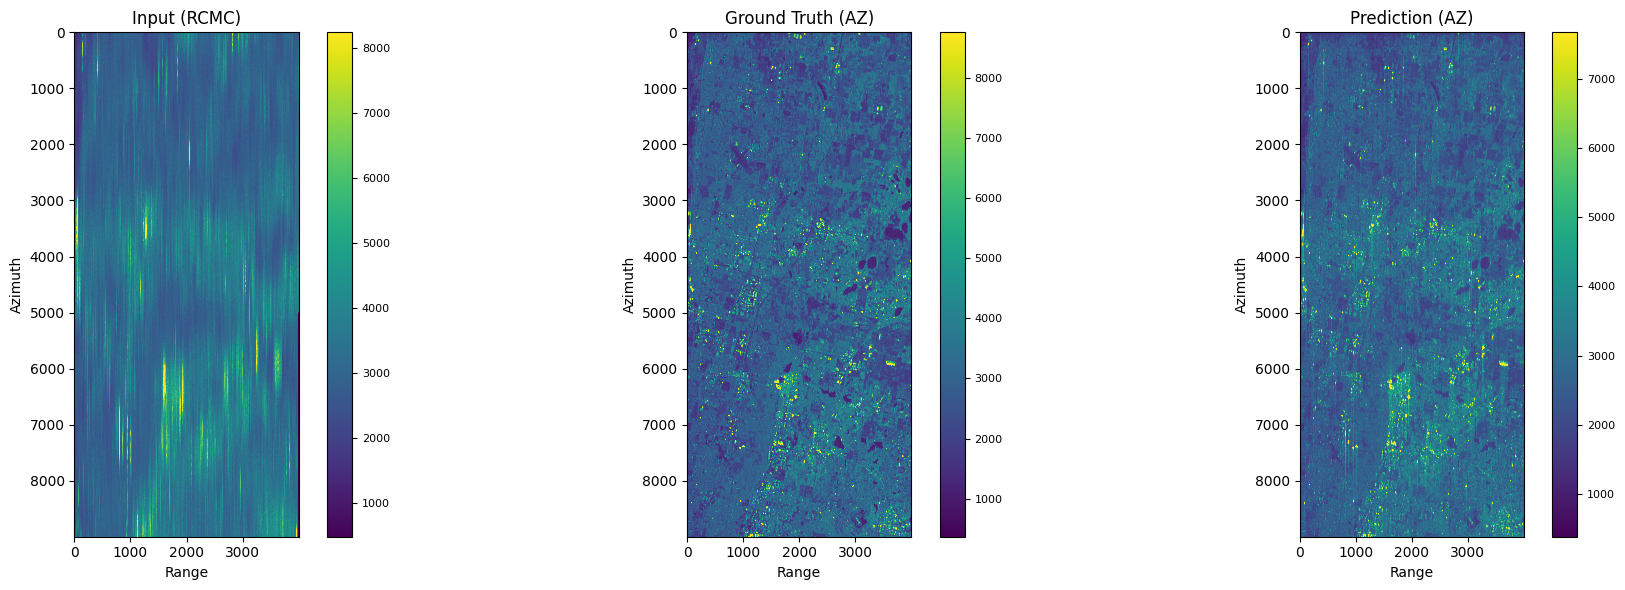

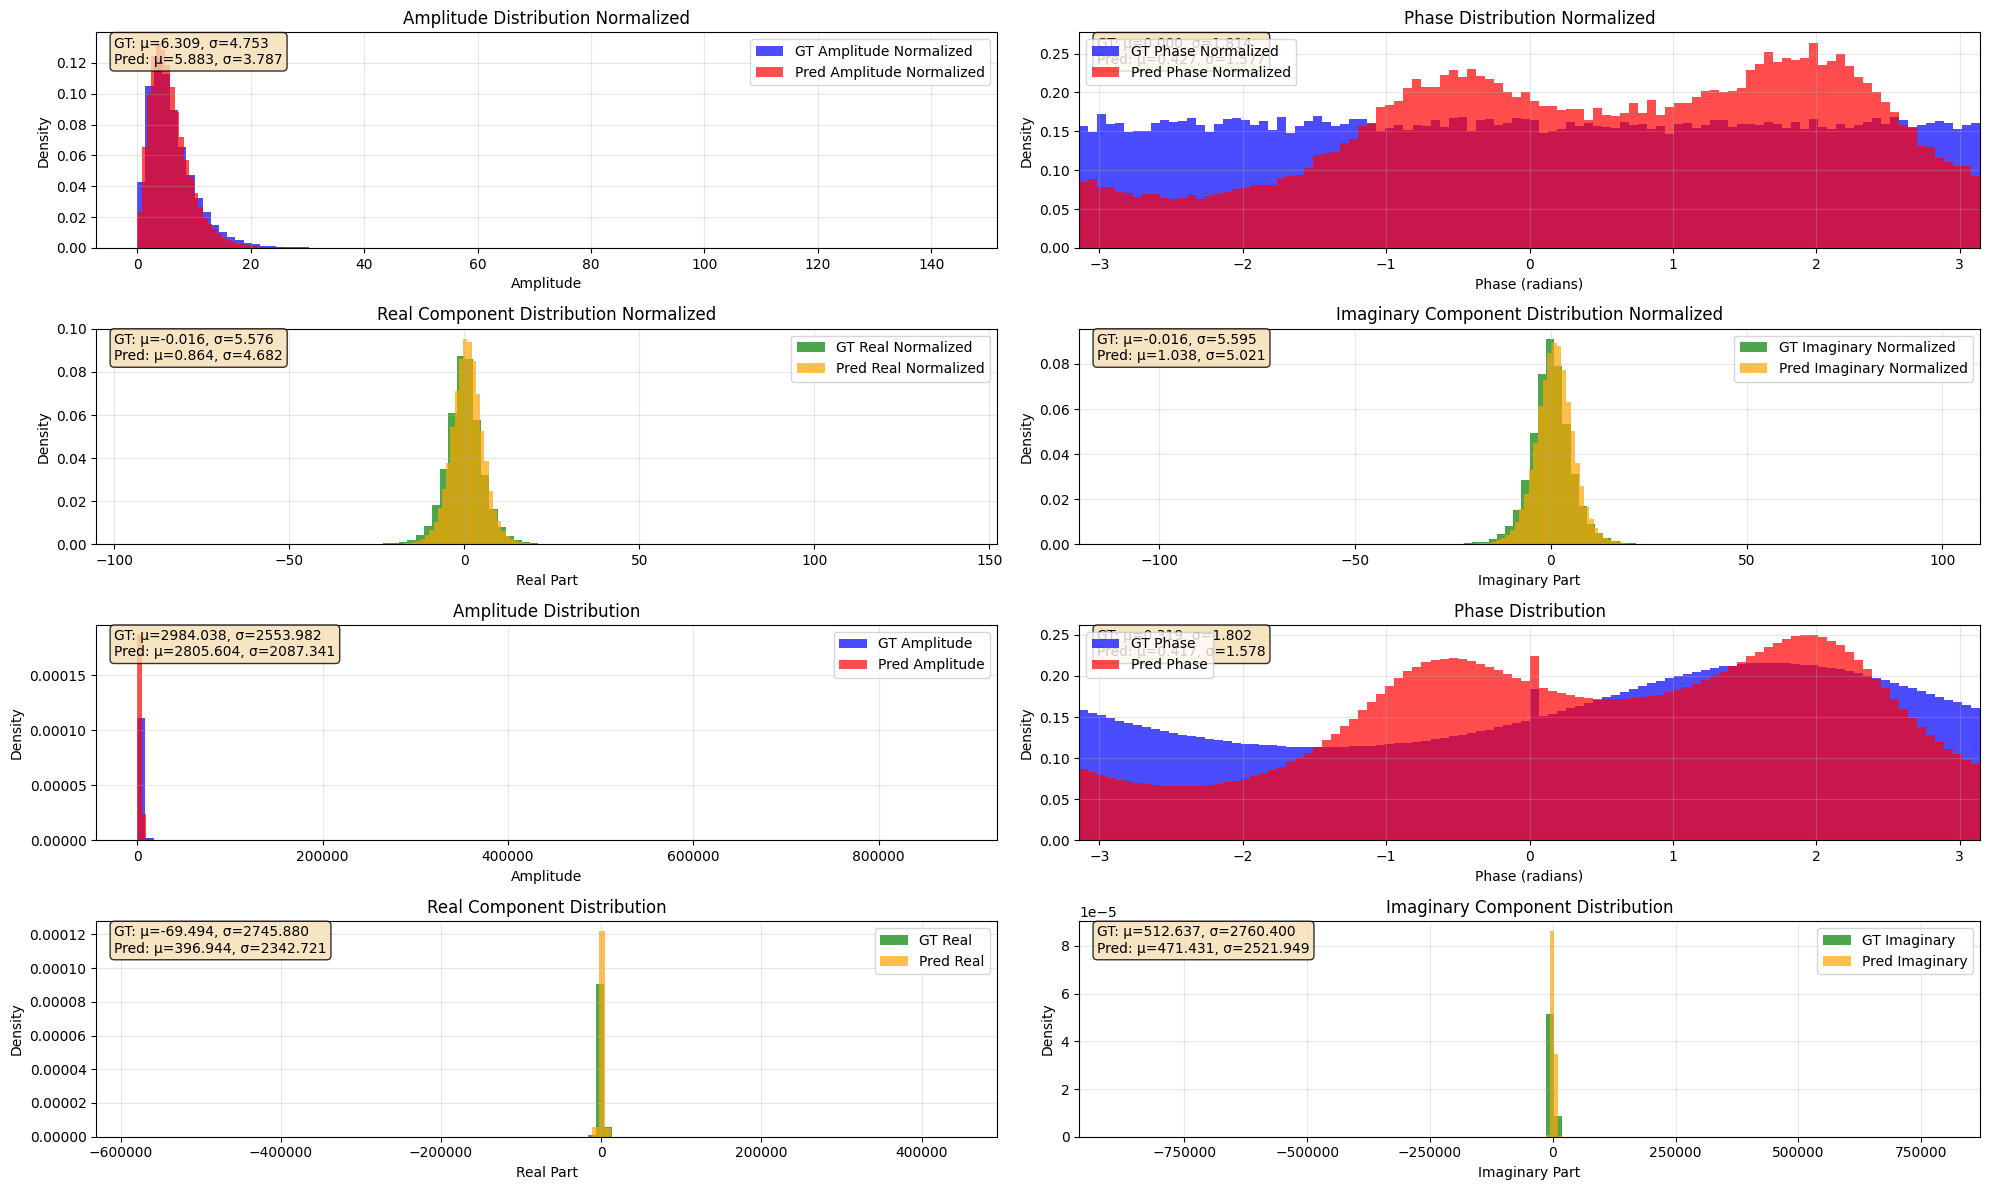


COMPLEX SAR DATA STATISTICS

Amplitude Normalized Component:
------------------------------
  GT    - Mean:   6.3092, Std:   4.7533, Min:   0.0099, Max: 144.3672
  Pred  - Mean:   5.8833, Std:   3.7872, Min:   0.0121, Max:  82.7653
  Diff  - Mean:   0.4259, Std:   4.6433

Phase Normalized Component:
------------------------------
  GT    - Mean:   0.0000, Std:   1.8144, Min:  -3.1414, Max:   3.1416
  Pred  - Mean:   0.4268, Std:   1.5768, Min:  -3.1415, Max:   3.1415
  Diff  - Mean:  -0.4268, Std:   2.4025

Real Normalized Component:
------------------------------
  GT    - Mean:  -0.0163, Std:   5.5764, Min: -93.4835, Max: 140.5362
  Pred  - Mean:   0.8640, Std:   4.6821, Min: -64.6341, Max:  56.7130
  Diff  - Mean:  -0.8803, Std:   7.3192

Imaginary Normalized Component:
------------------------------
  GT    - Mean:  -0.0159, Std:   5.5949, Min: -110.0124, Max:  99.1590
  Pred  - Mean:   1.0379, Std:   5.0210, Min: -60.2804, Max:  58.4648
  Diff  - Mean:  -1.0538, Std:   7.4979

Am

INFO:root:Visualization completed successfully!
INFO:root:Check the visualizations in: ./visualizations
INFO:root:Check the visualizations in: ./visualizations


In [2]:
args = argparse.Namespace(
    config="training_configs/s4_ssm_complex_sweep.yaml",
    pretrained_path=os.path.join(os.getcwd(), '..', 'results/run_20251102_135525/model_last.pth'),
    device="cuda", 
    batch_size=16,
    save_dir="./visualizations",
    mode="parallel",
    learning_rate=1e-4, 
    num_epochs=50
)

# Setup logging
logger = setup_logging()

# Load configuration
config = load_config(Path(args.config), args)

# Extract configurations
dataloader_cfg = config['dataloader']
training_cfg = config.get('training', {})

# Override save directory
save_dir = args.save_dir or training_cfg.get('save_dir', './visualizations')

# FIXED: Match training patch size to avoid artifacts!
# Training used [1000, 1] patches - use same for inference
dataloader_cfg['patch_size'] = [5000, 1] 
dataloader_cfg['stride'] = [4000, 1]     

logger.info("Configuration Summary:")
logger.info(f"  Data directory: {dataloader_cfg.get('data_dir', 'Not specified')}")
logger.info(f"  Level from: {dataloader_cfg.get('level_from', 'rc')}")
logger.info(f"  Level to: {dataloader_cfg.get('level_to', 'az')}")
logger.info(f"  Patch size: {dataloader_cfg.get('patch_size', [1000, 1])}")
logger.info(f"  Batch size: {dataloader_cfg.get('test', {}).get('batch_size', 'Not specified')}")
logger.info(f"  Save directory: {save_dir}")
logger.info("Creating test dataloader...")
try:
    _, _, test_loader, inference_loader = create_dataloaders(dataloader_cfg)
    logger.info(f"Created test dataloader with {len(inference_loader)} batches")
    logger.info(f"Dataset contains {len(inference_loader.dataset)} samples")
except Exception as e:
    logger.error(f"Failed to create test dataloader: {str(e)}")
    raise

try:
    model = create_model_with_pretrained(config['model'], pretrained_path=args.pretrained_path, device=args.device, start_key=None)#'model.')
except Exception as e:
    logger.error(f"Failed to load model: {str(e)}")
    raise

# Visualize samples
logger.info("Starting sample visualization...")
model_name = config['model']['name']
print(f"Using model: {model}")
inference_fn = get_training_loop_by_model_name(model_name, train_loader=inference_loader, val_loader=inference_loader, test_loader=inference_loader, model=model, save_dir=save_dir, mode=args.mode, loss_fn_name="mse", input_dim=model.input_dim)[0].forward
gts = []
preds = []
inputs = []
orig_gts = []
orig_preds = []
for i in range(3):
    gt, pred, input, orig_gt, orig_pred = get_full_image_and_prediction(
        dataloader=inference_loader,
        show_window=((1000, 1000), (10000, 5000)),
        zfile=i,
        inference_fn=inference_fn,
        return_input=True, 
        return_original=True,
        device="cuda", 
        vminmax='auto'
    )
    # gts.append(gt)
    # preds.append(pred)
    # inputs.append(input)
    # orig_gts.append(orig_gt)
    # orig_preds.append(orig_pred)
    print(compute_metrics(gt, pred))
    display_inference_results(
        input_data=input,
        gt_data=gt,
        pred_data=pred,
        figsize=(20, 6),
        vminmax="auto",  # Adjust this range based on your data, 
        show=True, 
        save=False
    )
    plot_intensity_histograms(orig_gt[..., 0], orig_pred, gt, pred, figsize=(20, 12), bins=100)
    logger.info("Visualization completed successfully!")
    logger.info(f"Check the visualizations in: {save_dir}")

    gt, pred, input, orig_gt, orig_pred = get_full_image_and_prediction(
        dataloader=test_loader,
        show_window=((1000, 1000), (10000, 5000)),
        zfile=i,
        inference_fn=inference_fn,
        return_input=True, 
        return_original=True,
        device="cuda", 
        vminmax='auto'
    )
    # gts.append(gt)
    # preds.append(pred)
    # inputs.append(input)
    # orig_gts.append(orig_gt)
    # orig_preds.append(orig_pred)

    print(compute_metrics(gt, pred))
    display_inference_results(
        input_data=input,
        gt_data=gt,
        pred_data=pred,
        figsize=(20, 6),
        vminmax="auto",  # Adjust this range based on your data, 
        show=True, 
        save=False
    )
    plot_intensity_histograms(orig_gt[..., 0], orig_pred, gt, pred, figsize=(20, 12), bins=100)
    logger.info("Visualization completed successfully!")
    logger.info(f"Check the visualizations in: {save_dir}")

